<a href="https://colab.research.google.com/github/bflaggs/DSPS_BFlaggs/blob/main/HW10/ffnn_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Must change runtime to GPU!!!!!

### Do this by...
Runtime -> Change runtime type -> GPU

### Must do this before doing anything or else you will have to rerun everything.

In [80]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

import pylab as pl
import numpy as np
import matplotlib.pyplot as plt



In [3]:
mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
len(mnist.load_data())

2

In [18]:
(x_train, _), (x_test, _) = mnist.load_data()

In [19]:
# First value is how many training images we have
x_train.shape

(60000, 28, 28)

In [20]:
# First value is how many testing images we have
x_test.shape

(10000, 28, 28)

In [21]:
nimg, img_row, img_col = x_train.shape

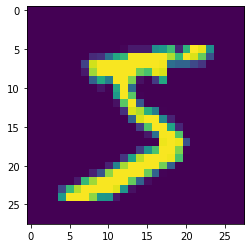

In [22]:
pl.imshow(x_train[0]);

This is the first of 60000 training images which we will use in our model to predict a digit.

In [23]:
x_train.max()

255

In [24]:
x_train.dtype

dtype('uint8')

In [25]:
# Normalize so that image values are now from 0 to 1 instead of 0 to 255

# Same normalization for the training and test set
x_train = (x_train.astype(float) / 255)

# Normalize and reshape x_test also
x_test = (x_test.astype(float) / 255)

In [28]:
# Make sure normalization worked for training set
x_train.min(), x_train.max()

(0.0, 1.0)

In [29]:
# Make sure normalization is the same for the testing set
x_test.min(), x_test.max()

(0.0, 1.0)

In [30]:
x_train.reshape(nimg, img_row*img_col).shape

(60000, 784)

In [31]:
# Reshape training set so that it is one-dimensional for a single image
# (can now be input into our model)

x_train = x_train.reshape(nimg, img_row*img_col)
x_train.shape

(60000, 784)

In [32]:
x_test.shape

(10000, 28, 28)

In [33]:
# Also reshape testing set so it is one-dimensional for a single image
x_test = x_test.reshape(x_test.shape[0], img_row*img_col)

In [34]:
# The y_train data must be a copy of our x_train data
# This is because our model is an encoder
# (encoder = transform data to a lower dimensional representation)
y_train = x_train.copy()

In [35]:
# Creates model
model_digits = Sequential()

In [36]:
# Add model layers
# Here we encode 28^2 = 784 dimensions down to 64 dimensions then de-encode

# Encoding...
#model_digits.add(Dense(256, activation="relu", input_dim=img_row*img_col))
model_digits.add(Dense(128, activation="relu", input_dim=img_row*img_col))
model_digits.add(Dense(64, activation="relu"))

# De-encoding... (last activation must be linear)
model_digits.add(Dense(128, activation="relu"))
model_digits.add(Dense(img_row*img_col, activation="linear"))

In [37]:
# Choose optimizer and loss function
# Can change these to try getting better results for our FFNN
# From slides, best combo looks like opt=adadelta and loss=binary_crossentropy
# where activation function must be "sigmoid" instead of "relu"

model_digits.compile(optimizer="adadelta", loss="mean_squared_error")

In [38]:
model_digits.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Architecture is x_train x_train instead of x_train y_train bc it's an encoder
ffnn_digit=model_digits.fit(x_train, x_train, validation_data=(x_test, x_test),
                            epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1051 - val_loss: 0.1067
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1049 - val_loss: 0.1065
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1046 - val_loss: 0.1063
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1044 - val_loss: 0.1060
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1042 - val_loss: 0.1058
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1039 - val_loss: 0.1055
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1037 - val_loss: 0.1053
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1034 - val_loss: 0.1050
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1032 - val_loss: 0.1048
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1029 - val_loss: 0.1045

In [63]:
ffnn_digit.history

{'loss': [0.10510491579771042,
  0.10487312078475952,
  0.10463941842317581,
  0.1044037789106369,
  0.10416600853204727,
  0.10392565280199051,
  0.10368286818265915,
  0.10343712568283081,
  0.10318828374147415,
  0.10293624550104141,
  0.10268082469701767,
  0.10242164880037308,
  0.10215868800878525,
  0.10189181566238403,
  0.1016206368803978,
  0.10134485363960266,
  0.10106454789638519,
  0.10077937692403793,
  0.1004890650510788,
  0.10019353032112122],
 'val_loss': [0.10673973709344864,
  0.10650079697370529,
  0.10625989735126495,
  0.10601673275232315,
  0.10577107965946198,
  0.10552280396223068,
  0.1052715852856636,
  0.10501721501350403,
  0.104759581387043,
  0.10449840128421783,
  0.10423348098993301,
  0.10396457463502884,
  0.10369154065847397,
  0.10341407358646393,
  0.10313195735216141,
  0.1028449609875679,
  0.10255298018455505,
  0.10225570946931839,
  0.10195300728082657,
  0.10164463520050049]}

In [65]:
out_loss = ffnn_digit.history['loss']
out_val_loss = ffnn_digit.history['val_loss']

In [67]:
len(out_loss), len(out_val_loss)

(20, 20)

In [71]:
epoch_num = np.linspace(1, len(out_loss), len(out_loss), endpoint=True)

In [75]:
# Make sure epoch number is defined correctly
epoch_num

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [78]:
out_loss = np.array(out_loss)
out_val_loss = np.array(out_val_loss)

In [79]:
out_loss, out_val_loss

(array([0.10510492, 0.10487312, 0.10463942, 0.10440378, 0.10416601,
        0.10392565, 0.10368287, 0.10343713, 0.10318828, 0.10293625,
        0.10268082, 0.10242165, 0.10215869, 0.10189182, 0.10162064,
        0.10134485, 0.10106455, 0.10077938, 0.10048907, 0.10019353]),
 array([0.10673974, 0.1065008 , 0.1062599 , 0.10601673, 0.10577108,
        0.1055228 , 0.10527159, 0.10501722, 0.10475958, 0.1044984 ,
        0.10423348, 0.10396457, 0.10369154, 0.10341407, 0.10313196,
        0.10284496, 0.10255298, 0.10225571, 0.10195301, 0.10164464]))

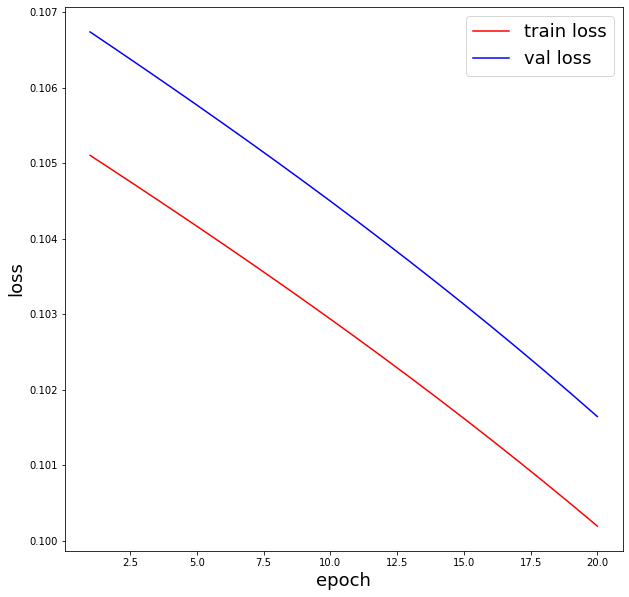

In [81]:
plt.figure(figsize=(10, 10))

plt.plot(epoch_num, out_loss, color='red', linestyle='solid',
         label='train loss')
plt.plot(epoch_num, out_val_loss, color='blue', linestyle='solid',
         label='val loss')

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()

Apparently we still have a lot of training to do (I think we need more epochs).